<a href="https://colab.research.google.com/github/Tienspkt/AI_20146196_Le-Minh-Tien/blob/main/08_AI_Nhandienchuviettay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from IPython.testing import test
import matplotlib.pyplot as plt
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()


so la : 5


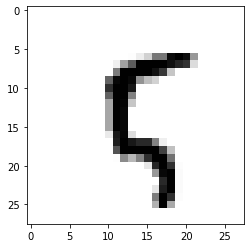

In [13]:
hinh = train_images [100]
plt.imshow(hinh, cmap=plt.cm.binary)
plt.show
print('so la :', train_labels[100])

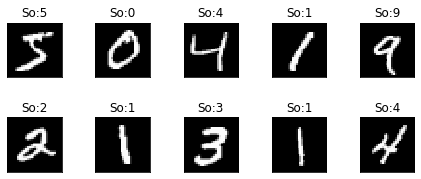

In [14]:
for i in range (10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap = 'gray', interpolation='none')
  plt.title('So:{}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [15]:
from keras.layers.attention.multi_head_attention import activation
from keras import models
from keras.layers import Dense
from keras.models import Sequential
model = Sequential()
model.add(Dense(512,activation='relu',input_shape = (28*28,),name = 'Lop1')) #28*28 laf kichs thuocw anh cos the thay
model.add(Dense(10,activation='softmax',name ='lopra'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Lop1 (Dense)                (None, 512)               401920    
                                                                 
 lopra (Dense)               (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
train_images = train_images.reshape((60000,28*28)) # rest taams anhr chuyen 2d thanhf 1d chuooi dai
train_images = train_images.astype('float32')/255 # chuyen sang so thuc

In [17]:
test_images = test_images.reshape((10000,28*28)) # rest taams anhr chuyen 2d thanhf 1d chuooi 
test_images = test_images.astype('float32')/255 # chuyen sang so thuc

In [18]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

In [19]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Độ chính xác trên tập kiểm tra:', test_acc)
print('Hàm mất mát trên tập kiểm tra:', test_loss)



Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.2638 - accuracy: 0.9247
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1057 - accuracy: 0.9684
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0694 - accuracy: 0.9789
Epoch 4/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0507 - accuracy: 0.9849
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0376 - accuracy: 0.9885
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0283 - accuracy: 0.9918
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0226 - accuracy: 0.9934
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0169 - accuracy: 0.9953
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0131 - accuracy: 0.9965
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0563 - accuracy: 0.9832

In [21]:
model.save('model1.h5') # luuw mo hinh 

In [22]:
from keras.saving.legacy.save import load_model
model11 = load_model('model1.h5') # truy xuat mo hinh
model11.predict(test_images[51])

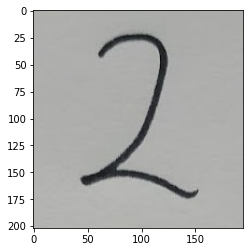

In [55]:
from keras.utils import load_img
import numpy as np 
import pandas as pd
url ="2.jpg"
img = load_img(url)
plt.imshow(img)

In [63]:
from keras.utils.image_utils import img_to_array
img = load_img(url,target_size=(28,28))
img = img_to_array(img)
img = img.reshape(28,28)
img = img.astype('float32')
img = img/256
np.argmax(model.predict(img),axis=1)

ValueError: ignored